In [31]:
import pymc3 as pm
import numpy as np
from matplotlib import pyplot as plt

with pm.Model() as model:
    N = 2 # Number of factories
    data = np.array([0,0,0,1,1,1,1,1,1])  # N = 9, z = 6
    κ = 40 # Concentration for prior
    m = pm.Categorical('m',p=[.5,.5])  # Prior probabilities for model index
    ω = pm.math.switch(m, .75, .25)  # Switch to decide which ω to use
    θ = pm.Beta('θ', ω*(κ-2)+1, (1-ω)*(κ-2)+1)  # θ prior    
    y = pm.Bernoulli('y', p=θ, observed=data, shape=N) # Likelihoods

    prior = pm.sample_prior_predictive(10000)    
    trace = pm.sample(10000,step=pm.Metropolis())


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [θ]
>Metropolis: [m]
Sampling 4 chains, 0 divergences: 100%|██████████| 42000/42000 [00:05<00:00, 7283.49draws/s]
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1447e7c50>],
      dtype=object)

<Figure size 1224x288 with 0 Axes>

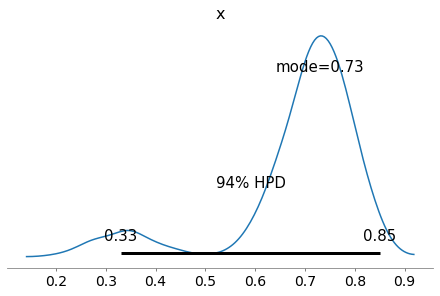

In [32]:
fig = plt.figure(figsize=(17,4))

app = np.concatenate((trace['θ'][trace['m']==0],trace['θ'][trace['m']==1]))

pm.plot_posterior(app, point_estimate='mode')
